### 6.5 Unsupervised Machine Learning: Clustering

In [1]:
#Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler 
import pylab as pl 

In [2]:
df = pd.read_csv(r'/Users/dorinasalam/Desktop/10-2023 Health Insurance Analysis/01.Data/insurance_data_cleaned.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df_num = df[['age', 'bmi', 'children', 'charges']]

In [5]:
df_num.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


### Preprocessing data:

In [6]:
# Standardization of numeric values in dataset

scaler = StandardScaler()
df_std = scaler.fit_transform(df_num)

### Elbow technique:

In [7]:
# Defining the range of potential clusters in the data.

num_cl = range(1, 15) 
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [8]:
# Creating a score that represents a rate of variation 

score = [kmeans[i].fit(df_std).score(df_std) for i in range(len(kmeans))] 
score

/Users/dorinasalam/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/dorinasalam/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/dorinasalam/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/dorinasalam/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.wa

[-5348.0,
 -4085.482817704872,
 -3310.620915072391,
 -2571.320696404403,
 -2207.851534186052,
 -1982.316657185898,
 -1798.3327897060567,
 -1658.4402941103913,
 -1553.7559877611152,
 -1453.9220819294492,
 -1371.7847264830339,
 -1299.7446946835778,
 -1233.8547618133937,
 -1178.4173932480094]

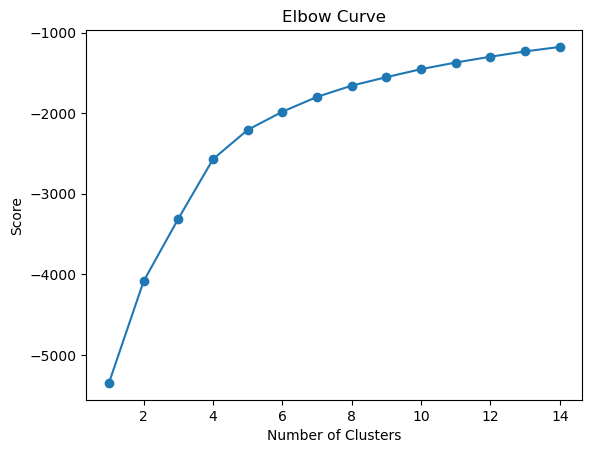

In [9]:
# Plotting the elbow curve using PyLab.

pl.plot(num_cl,score, marker = 'o')
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### Interpretation: the elbow where the curve starts to flatten out is at 5 clusters. This will be the number used going forward for the k-means clustering.

### K-means clustering:

In [10]:
# Creating the k-means object.

kmeans = KMeans(n_clusters = 5) 

In [11]:
# Fitting the k-means object to the data.

kmeans.fit(df_std)

/Users/dorinasalam/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [12]:
df['clusters'] = kmeans.fit_predict(df_std)

/Users/dorinasalam/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [13]:
df.head()

,age,sex,bmi,children,smoker,region,charges,clusters
0,19,female,27.900,0,yes,southwest,16884.92400,3
1,18,male,33.770,1,no,southeast,1725.55230,3
2,28,male,33.000,3,no,southeast,4449.46200,1
3,33,male,22.705,0,no,northwest,21984.47061,2
4,32,male,28.880,0,no,northwest,3866.85520,3


In [14]:
df['clusters'].value_counts()

3    378
1    292
2    283
0    219
4    165
Name: clusters, dtype: int64

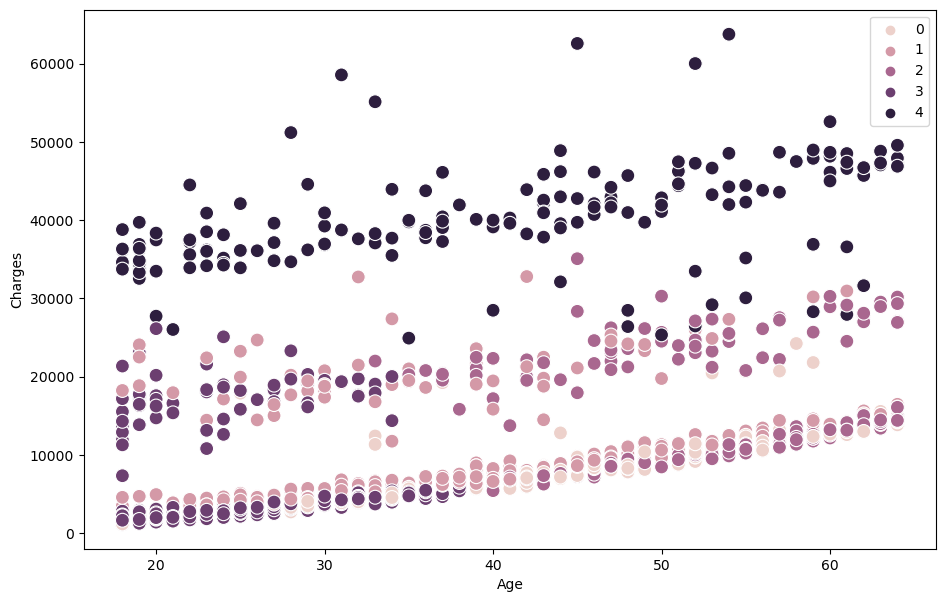

In [15]:
# Plotting the clusters 

plt.figure(figsize=(11,7))
sct1 = sns.scatterplot(x=df['age'], y=df['charges'], hue=kmeans.labels_, s=100) 
sct1.grid(False)
plt.xlabel('Age') 
plt.ylabel('Charges') 
plt.show()

In [16]:
sct1.figure.savefig(r'/Users/dorinasalam/Desktop/10-2023 Health Insurance Analysis/03. Visualizations/cluster_age_charges.png')

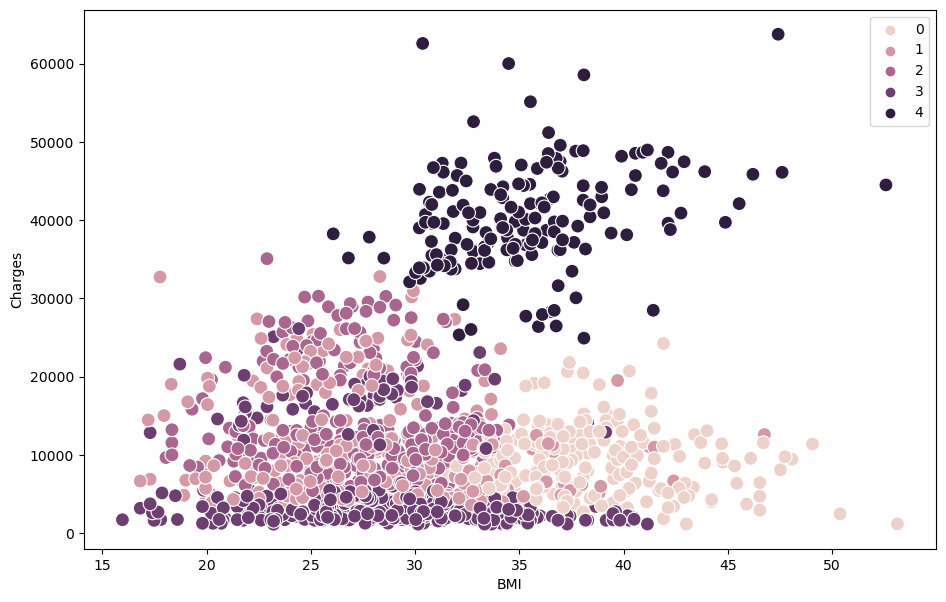

In [17]:
# Plotting the clusters 

plt.figure(figsize=(11,7))
sct2 = sns.scatterplot(x=df['bmi'], y=df['charges'], hue=kmeans.labels_, s=100) 
sct2.grid(False)
plt.xlabel('BMI') 
plt.ylabel('Charges') 
plt.show()

In [18]:
sct2.figure.savefig(r'/Users/dorinasalam/Desktop/10-2023 Health Insurance Analysis/03. Visualizations/cluster_bmi_charges.png')

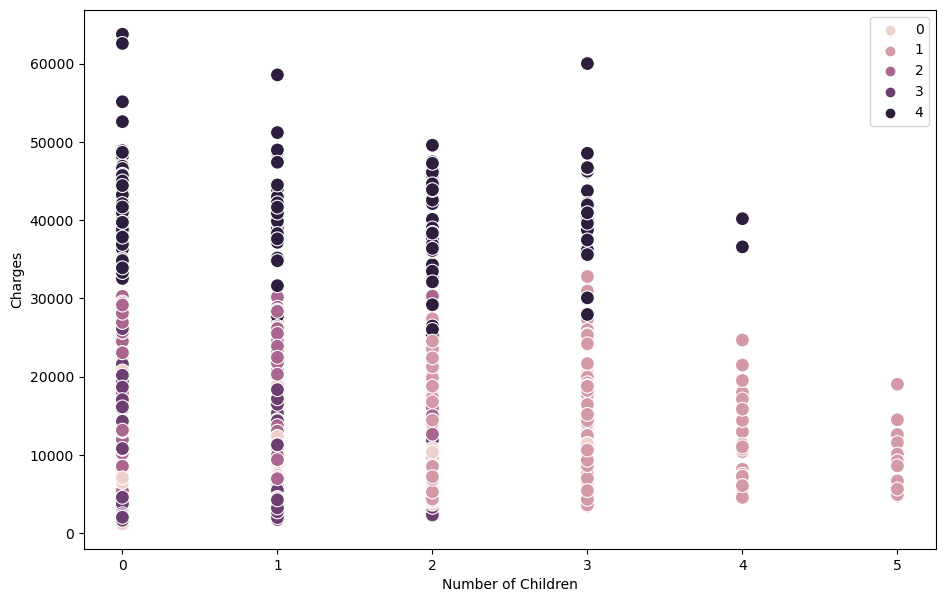

In [19]:
# Plotting the clusters 

plt.figure(figsize=(11,7))
sct3 = sns.scatterplot(x=df['children'], y=df['charges'], hue=kmeans.labels_, s=100) 
sct3.grid(False)
plt.xlabel('Number of Children') 
plt.ylabel('Charges') 
plt.show()

In [20]:
sct3.figure.savefig(r'/Users/dorinasalam/Desktop/10-2023 Health Insurance Analysis/03. Visualizations/cluster_children_charges.png')

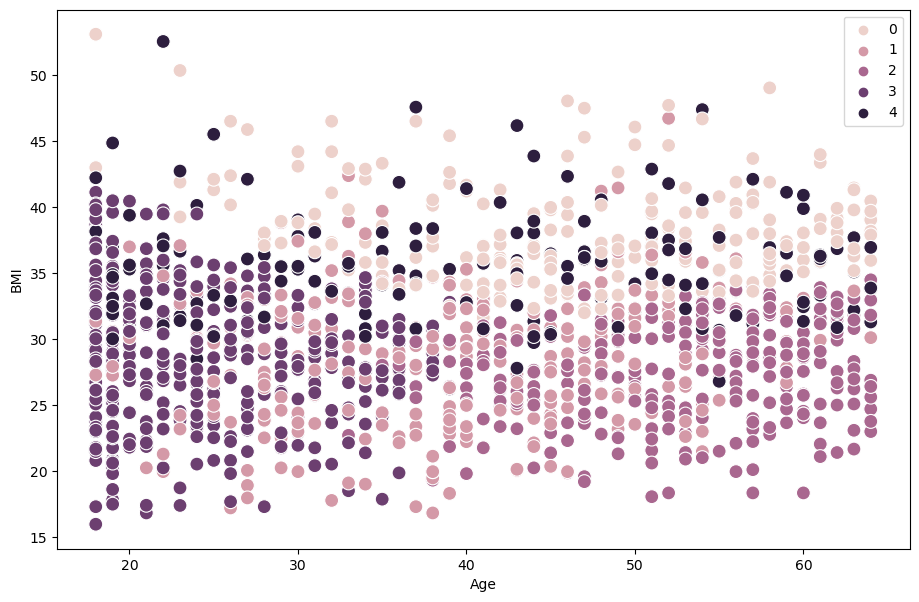

In [21]:
# Plotting the clusters 

plt.figure(figsize=(11,7))
sct4 = sns.scatterplot(x=df['age'], y=df['bmi'], hue=kmeans.labels_, s=100) 
sct4.grid(False)
plt.xlabel('Age') 
plt.ylabel('BMI') 
plt.show()

In [22]:
sct4.figure.savefig(r'/Users/dorinasalam/Desktop/10-2023 Health Insurance Analysis/03. Visualizations/cluster_bmi_age.png')

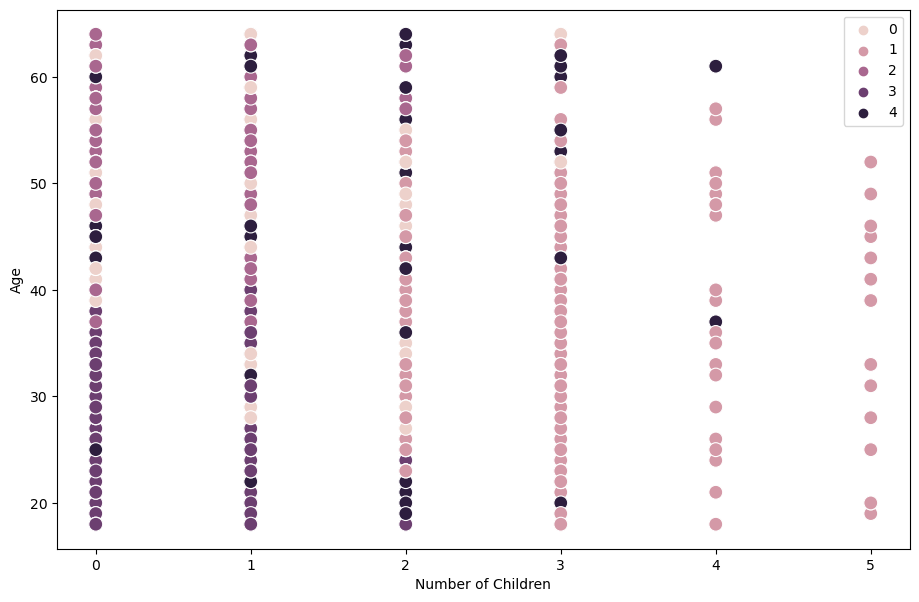

In [23]:
# Plotting the clusters 

plt.figure(figsize=(11,7))
sct5 = sns.scatterplot(x=df['children'], y=df['age'], hue=kmeans.labels_, s=100) 
sct5.grid(False)
plt.xlabel('Number of Children') 
plt.ylabel('Age') 
plt.show()

In [24]:
sct5.figure.savefig(r'/Users/dorinasalam/Desktop/10-2023 Health Insurance Analysis/03. Visualizations/cluster_age_children.png')

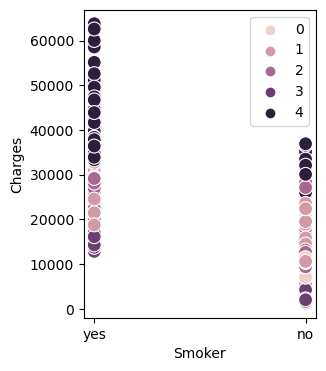

In [25]:
# Plotting the clusters 

plt.figure(figsize=(3,4))
sct6 = sns.scatterplot(x=df['smoker'], y=df['charges'], hue=kmeans.labels_, s=100) 
sct6.grid(False)
plt.xlabel('Smoker') 
plt.ylabel('Charges') 
plt.show()

In [26]:
sct6.figure.savefig(r'/Users/dorinasalam/Desktop/10-2023 Health Insurance Analysis/03. Visualizations/cluster_smoker.png')

#### The light pink cluster represents people with a mean age of 52 and are overweight but not obese, they have charges 30k or less. The pink cluster has low charges compared to the rest of the groups but not as low as the dark pink. The dark pink are the youngest people with the lowest charges. The purple cluster represents the people categorized as obese and their charges are also 30k or less. The dark purple cluster has significantly higher charges but these scatter plots do not explain why. Perhaps the smoker variable would need to be further explored.  

### Grouping data by clusters:

In [27]:
df.loc[df['clusters'] == 0, 'cluster'] = 'light pink'
df.loc[df['clusters'] == 1, 'cluster'] = 'pink'
df.loc[df['clusters'] == 2, 'cluster'] = 'dark pink'
df.loc[df['clusters'] == 3, 'cluster'] = 'purple'
df.loc[df['clusters'] == 4, 'cluster'] = 'dark purple'

In [28]:
df.groupby('cluster').agg({'age':['mean', 'median'], 
                         'bmi':['mean', 'median'], 
                         'children':['mean', 'median'],
                          'charges':['mean', 'median']})

age               bmi           children         \
                  mean median       mean   median      mean median   
cluster                                                              
dark pink    52.508834   53.0  27.259611  27.5000  0.431095    0.0   
dark purple  40.090909   41.0  35.342182  34.9600  1.169697    1.0   
light pink   46.716895   47.0  38.215548  37.4000  0.890411    1.0   
pink         38.989726   39.0  28.469161  28.6000  2.773973    3.0   
purple       24.732804   23.0  28.489167  28.4475  0.383598    0.0   

                  charges                
                     mean        median  
cluster                                  
dark pink    13862.849369  11842.442000  
dark purple  40303.726542  39774.276300  
light pink    9347.646904   8944.115100  
pink         10687.325693   8530.145725  
purple        5325.530166   3066.658475

### These results shed a light on the different clusters within the data. It is easier to identify what similarities the groups have to futher explore the relationships between the variables. This information is valuable in determining what risk factors may contribute to higher insurance claims.

In [29]:
df.to_csv(r'/Users/dorinasalam/Desktop/10-2023 Health Insurance Analysis/01.Data/insurance_data_clusters.csv')